<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1528 non-null   object 
 1   Date        1528 non-null   object 
 2   PM2.5       1528 non-null   float64
 3   PM10        1528 non-null   float64
 4   NO          1528 non-null   float64
 5   NO2         1528 non-null   float64
 6   NOx         1528 non-null   float64
 7   NH3         1528 non-null   float64
 8   CO          1528 non-null   float64
 9   SO2         1528 non-null   float64
 10  O3          1528 non-null   float64
 11  Benzene     1528 non-null   float64
 12  Toluene     1528 non-null   float64
 13  AQI         1528 non-null   float64
 14  AQI_Bucket  1528 non-null   object 
dtypes: float64(12), object(3)
memory usage: 179.2+ KB


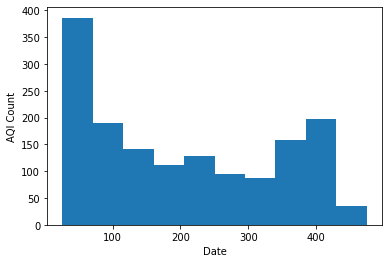

In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

path = "koldataset_smoted.csv"
df = pd.read_csv(path)
#to describe the dataframe
df.describe()
# to determine shape of dataframe
df.shape
#extra info about the dataset
df.info()
#to check null values in dataset
df.isnull()
df.isnull().sum()

plt.hist(df["AQI"])
plt.xlabel("Date")
plt.ylabel("AQI Count")
plt.show()




In [2]:
X=df.iloc[:, 1:-2] #except last 2 columns
y=df.iloc[:, 13:14] #only 13th column


In [3]:
y

,AQI
0,119.000000
1,107.000000
2,148.000000
3,94.000000
4,100.000000
...,...
1523,106.973029
1524,105.750768
1525,106.715756
1526,114.277272


splitting of dataset

In [4]:
df_x, df_x1, df_y, df_y1= train_test_split(X,y,test_size=0.3, random_state=42)
#df.drop(["City"], axis=1, inplace=True)
df_x["Date"] = pd.to_datetime(df_x["Date"]) #convert object to workable datatype acc to panda [datetime]
df_x1["Date"] = pd.to_datetime(df_x["Date"])
df_x["Date"] = pd.to_datetime(df_x["Date"])
df_x1["Date"] = pd.to_datetime(df_x["Date"])
X_train = df_x.drop(['Date'], axis = 1) #axis=1 means removing column
y_train = df_y["AQI"]
X_test = df_x1.drop(['Date'], axis = 1)
y_test = df_y1["AQI"]

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train) #use fit_transform for train and transform for test
X_test=sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1)) #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [6]:
df.head() #first 5 rows
rf=RandomForestRegressor(n_estimators = 1000, random_state = 42) #n_estimators->the number of trees you want to build before taking the maximum voting or averages of predictions.
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_test

array([[-1.16141992e+00],
       [-1.03050478e+00],
       [ 2.22010150e-01],
       [-9.06862704e-01],
       [-1.14102642e+00],
       [ 1.63564742e+00],
       [-8.41405133e-01],
       [-1.30796128e-01],
       [ 1.02749016e-01],
       [ 5.25054237e-01],
       [-3.32458707e-01],
       [ 1.62205395e+00],
       [-7.97766752e-01],
       [-2.34586707e-01],
       [-4.70478897e-01],
       [ 1.16403053e+00],
       [-1.17596605e+00],
       [-1.19778524e+00],
       [-9.14135767e-01],
       [ 4.16834842e-01],
       [-1.18502698e+00],
       [-9.86866402e-01],
       [-1.65010233e-01],
       [ 3.73196462e-01],
       [-1.17857868e+00],
       [-1.07414316e+00],
       [ 1.18179455e+00],
       [ 9.68959438e-01],
       [-1.13960073e+00],
       [ 1.63360564e+00],
       [-1.79556360e-01],
       [-9.57774148e-01],
       [-1.23202855e+00],
       [-4.26840517e-01],
       [ 1.60617835e+00],
       [ 1.60549428e+00],
       [ 1.56629114e+00],
       [-1.05232397e+00],
       [-1.1

calculating metrics


In [7]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_pred)
mean_error = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)
print("Accuracy is", 1 - mae)

R2 SCORE is 0.9901318061406664
mean_sqrd_error is  0.009766165742049207
Root mean squared error of is 0.09882391280479239
Mean Absolute error is 0.062561626661
Accuracy is 0.937438373339


In [8]:
y_test.reshape(-1,1) #specifies the new shape of the array w/o changing data inside
y_test

array([[-1.16141992e+00],
       [-1.03050478e+00],
       [ 2.22010150e-01],
       [-9.06862704e-01],
       [-1.14102642e+00],
       [ 1.63564742e+00],
       [-8.41405133e-01],
       [-1.30796128e-01],
       [ 1.02749016e-01],
       [ 5.25054237e-01],
       [-3.32458707e-01],
       [ 1.62205395e+00],
       [-7.97766752e-01],
       [-2.34586707e-01],
       [-4.70478897e-01],
       [ 1.16403053e+00],
       [-1.17596605e+00],
       [-1.19778524e+00],
       [-9.14135767e-01],
       [ 4.16834842e-01],
       [-1.18502698e+00],
       [-9.86866402e-01],
       [-1.65010233e-01],
       [ 3.73196462e-01],
       [-1.17857868e+00],
       [-1.07414316e+00],
       [ 1.18179455e+00],
       [ 9.68959438e-01],
       [-1.13960073e+00],
       [ 1.63360564e+00],
       [-1.79556360e-01],
       [-9.57774148e-01],
       [-1.23202855e+00],
       [-4.26840517e-01],
       [ 1.60617835e+00],
       [ 1.60549428e+00],
       [ 1.56629114e+00],
       [-1.05232397e+00],
       [-1.1

In [9]:
y_pred.reshape(-1,1)

array([[-1.18490424],
       [-0.98801062],
       [ 0.2501222 ],
       [-0.8873418 ],
       [-1.14054022],
       [ 1.61455192],
       [-0.54163348],
       [-0.07551417],
       [-0.23178597],
       [ 0.42731012],
       [-0.29816349],
       [ 1.61551471],
       [-0.73149835],
       [-0.29527413],
       [-0.36061352],
       [ 1.03630694],
       [-1.22373121],
       [-1.20484413],
       [-0.93583764],
       [ 0.63557115],
       [-1.168759  ],
       [-0.90178648],
       [-0.31227514],
       [ 0.39158547],
       [-1.17569379],
       [-1.09033582],
       [ 1.15424575],
       [ 0.97611276],
       [-1.16830377],
       [ 1.60924209],
       [ 0.0196645 ],
       [-0.97072117],
       [-1.22570254],
       [-0.42264884],
       [ 1.41481266],
       [ 1.60526908],
       [ 1.57411052],
       [-1.00648102],
       [-1.18303421],
       [-0.41388078],
       [ 1.62499698],
       [ 1.6187031 ],
       [ 0.36265228],
       [ 1.59378184],
       [-1.00332041],
       [-0

plotting graphs

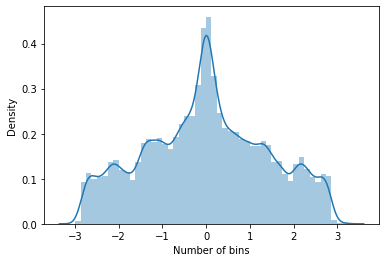

In [10]:
predictions = rf.predict(X_test)
fig = sns.distplot(y_test-predictions) #using the seaborn library we create an histogram of predicted values
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig) 

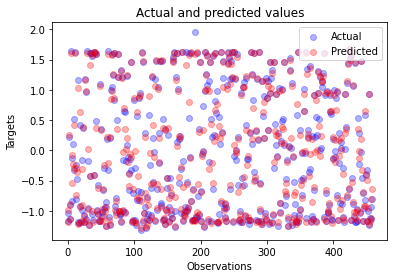

In [11]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend()
plt.show()

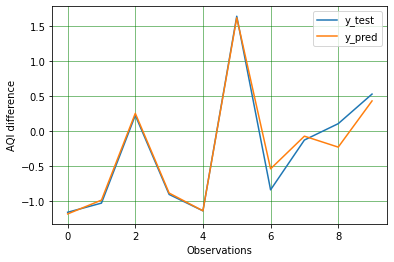

In [12]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(y_pred.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_pred'))
plt.show()


In [13]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_pred
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,-1.161420,-1.184904,0.023484,Accurate,-2.022035
1,-1.030505,-0.988011,-0.042494,Accurate,-4.123626
2,0.222010,0.250122,-0.028112,Accurate,12.662508
3,-0.906863,-0.887342,-0.019521,Accurate,-2.152575
4,-1.141026,-1.140540,-0.000486,Accurate,-0.042611
5,1.635647,1.614552,0.021096,Accurate,1.289734
6,-0.841405,-0.541633,-0.299772,Accurate,-35.627504
7,-0.130796,-0.075514,-0.055282,Accurate,-42.265746
8,0.102749,-0.231786,0.334535,Accurate,325.584618
9,0.525054,0.427310,0.097744,Accurate,18.616005
